# Garbage Classifier - Training Notebook

<a target="_blank" href="https://colab.research.google.com/github/WholeNow/Garbage_Classifier/blob/main/training.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import sys

# Environment detection
try:
    import google.colab
    IS_COLAB = True
except ImportError:
    IS_COLAB = False

if IS_COLAB:
    BASE_PATH = "/content"
    
    # Clone repository
    repo_name = "Garbage_Classifier"
    repo_url = "https://github.com/WholeNow/Garbage_Classifier.git"
    repo_path = os.path.join(BASE_PATH, repo_name)

    if not os.path.exists(repo_path):
        !git clone {repo_url}

    BASE_PATH = repo_path
    os.chdir(BASE_PATH)
    sys.path.append(BASE_PATH)
    
    print(f"Colab environment initialized: {BASE_PATH}")
else:
    # If local, assume the execution directory is 'notebooks' and move one level up
    BASE_PATH = os.getcwd()
    BASE_PATH = os.path.abspath(os.path.join(BASE_PATH, os.pardir)) 
    sys.path.append(BASE_PATH)
    print(f"Local environment initialized: {BASE_PATH}")

Local environment initialized: /Users/marcopilia/Desktop/Garbage_Classifier


/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <367D4265-B20F-34BD-94EB-4F3EE47C385B> /Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/image.so
  Reason: tried: '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/envs/ML/lib/python3.12/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/marcopilia/miniconda3/e

[INFO] Seed set: 42
[INFO] Device: MPS (Apple Silicon)
[TRAIN] Starting training of Xception
[INFO] Dataset -> Train: 9730, Val: 2085, Test: 2086



[TRAIN] Training interrupted by user (Ctrl+C).
[INFO] Training metrics saved to 'out/training_metrics.png'


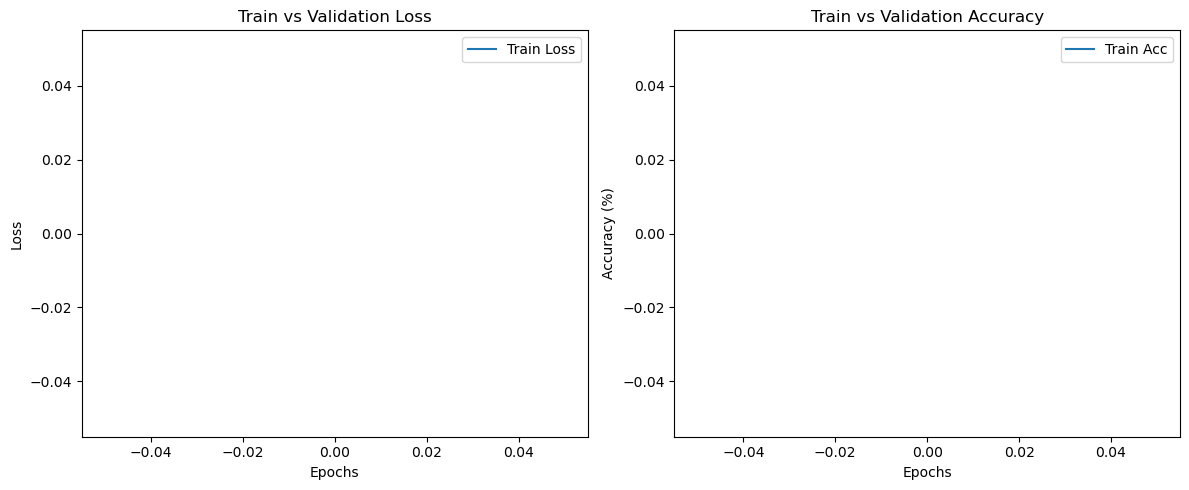

--> Last Model Saved at out/garbage_custom_1_best.pth
[TRAIN] Completed.


In [ ]:
from config import TrainConfig
from train import train

config = TrainConfig(
    # Paths and Model
    root_dir='images',      
    model_name='Xception',
    pretrained=False,
    output_dir="out",

    # Hyperparameters
    batch_size=32,
    num_epochs=5,
    val_epochs=1,
    learning_rate=0.001,

    # Scheduler (Step Decay)
    step_size=10,
    gamma=0.1,

    # Regularization (if you want to remove one or both, set the respective lambda to 0)
    l1_lambda=0.0001, 
    l2_lambda=0.0001, 

    # Split Dataset
    val_split=0.15,
    test_split=0.15,

    # Input Images
    img_size=256,

    # Normalization
    compute_stats=False,
    mean=[0.6582812666893005, 0.6344856023788452, 0.6075275540351868],
    std=[0.6582812666893005, 0.6344856023788452, 0.6075275540351868],

    # System
    seed=42,
    num_workers=0,
    device="auto",
    checkpoint_path="garbage_custom_1_best.pth",
)

train(config)